In [116]:
import pandas as pd
import numpy as np
import math

#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### read the dataset

In [557]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('churn_labels_new_data.csv')

In [43]:
df.head()

ID_user  gender        age                      txn_time  \
0    8985038  female  46.213898  1495 days 07:29:00.000000000   
1  174867143  female  59.000000  1281 days 00:24:00.000000000   
2    9115418    male  38.000000  1380 days 00:50:00.000000000   
3   53946950  female  43.000000  1522 days 20:52:00.000000000   
4  184235069  female  34.092336  1274 days 16:16:00.000000000   

   days_bw_first_last_txn  daysb/w_today_latest_txn     first_trans_date  \
0                    1495                       142  2010-11-08 10:01:00   
1                    1281                        26  2011-10-04 10:05:00   
2                    1380                       257  2010-11-08 12:59:00   
3                    1522                        35  2011-01-26 13:24:00   
4                    1274                         6  2011-10-30 19:54:00   

       last_trans_date  txn_counts_unique  prod_counts_unique  txn_counts_all  \
0  2014-12-12 17:30:00                 72                  26             196   
1  2015-04-07 10:29:00                163                  78             317   
2  2014-08-19 13:49:00                258                  75             344   
3  2015-03-29 10:16:00                126                  41             212   
4  2015-04-27 12:10:00                128                  52             168   

   tot_sum_price  most_spent_prod_category  most_recent_prod_category  \
0      2496286.0                     262.0                      490.0   
1      2154321.0                     262.0                      200.0   
2      2070991.0                     104.0                      154.0   
3      1510886.0                     104.0                      200.0   
4      1265108.0                     490.0                      200.0   

   spent_per_trans  most_recent_trans_month  most_recent_trans_year  \
0     12736.153061                       12                    2014   
1      6795.965300                        4                    2015   
2      6020.322674                        8                    2014   
3      7126.820755                        3                    2015   
4      7530.404762                        4                    2015   

   first_trans_season  last_trans_season  avg_days_bw_txns  cluster  churn  \
0                   0                  0              7.63        2      0   
1                   0                  1              4.04        2      0   
2                   0                  2              4.01        2      1   
3                   3                  1              7.18        2      0   
4                   0                  1              7.58        2      0   

   first_trans_year  
0              2010  
1              2011  
2              2010  
3              2011  
4              2011

In [44]:
df.describe()

ID_user          age  days_bw_first_last_txn  \
count  6.583000e+03  6583.000000             6583.000000   
mean   1.851419e+10    32.865452              322.315662   
std    3.060662e+10     8.492376              449.837325   
min    2.165900e+04     1.000000                0.000000   
25%    1.325623e+08    27.563640                0.000000   
50%    2.930813e+08    31.546604               19.000000   
75%    3.613400e+10    36.883005              586.000000   
max    9.744034e+10   115.000000             1753.000000   

       daysb/w_today_latest_txn  txn_counts_unique  prod_counts_unique  \
count               6583.000000        6583.000000         6583.000000   
mean                 506.295002           4.361689            2.654109   
std                  434.518459           9.493251            4.334842   
min                    0.000000           1.000000            0.000000   
25%                  145.000000           1.000000            1.000000   
50%                  381.000000           2.000000            1.000000   
75%                  794.500000           4.000000            3.000000   
max                 1742.000000         258.000000           78.000000   

       txn_counts_all  tot_sum_price  most_spent_prod_category  \
count     6583.000000   6.583000e+03               6583.000000   
mean         6.521343   4.358764e+04                265.350448   
std         14.791526   9.547810e+04                170.268570   
min          1.000000   1.300000e+01                  1.000000   
25%          1.000000   6.097000e+03                127.000000   
50%          2.000000   1.695200e+04                260.000000   
75%          6.000000   4.544800e+04                442.000000   
max        344.000000   2.496286e+06                510.000000   

       most_recent_prod_category  spent_per_trans  most_recent_trans_month  \
count                6583.000000      6583.000000              6583.000000   
mean                  265.712897      9626.807135                 6.690415   
std                   164.460041     13277.753610                 3.926146   
min                     1.000000        13.000000                 1.000000   
25%                   139.000000      2990.000000                 3.000000   
50%                   260.000000      4927.000000                 7.000000   
75%                   438.000000     10170.333333                11.000000   
max                   510.000000    259987.000000                12.000000   

       most_recent_trans_year  first_trans_season  last_trans_season  \
count             6583.000000         6583.000000        6583.000000   
mean              2013.434604            1.387058           1.420325   
std                  1.237370            1.180064           1.219708   
min               2010.000000            0.000000           0.000000   
25%               2013.000000            0.000000           0.000000   
50%               2014.000000            1.000000           1.000000   
75%               2014.000000            3.000000           3.000000   
max               2015.000000            3.000000           3.000000   

       avg_days_bw_txns      cluster        churn  first_trans_year  
count       6583.000000  6583.000000  6583.000000       6583.000000  
mean          51.597027     0.354702     0.530457       2012.543217  
std           88.545035     0.508328     0.499109          1.299291  
min            0.000000     0.000000     0.000000       2010.000000  
25%            0.000000     0.000000     0.000000       2011.000000  
50%            5.000000     0.000000     1.000000       2013.000000  
75%           70.320000     1.000000     1.000000       2014.000000  
max          768.000000     2.000000     1.000000       2015.000000

#### Utility functions

In [134]:
#one hot encoder function
def do_one_hot_encoding(df_name, df_column_name, suffix=''):
    '''
    usage: dataframe[column_name] = do_one_hot_encoding(dataframe, column_name, suffix_for_column_name)
    '''
    x = pd.get_dummies(df_name[df_column_name])
    df_name = df_name.join(x, lsuffix=suffix)
    df_name = df_name.drop(df_column_name, axis=1) 
    return df_name


#label encoder function
def label_encoding_func(df_name, df_col_name):
    '''
    usage: dataframe[column_name] = label_encoding_function(dataframe, column_name)
    '''
    le = preprocessing.LabelEncoder()
    le.fit(df_name[df_col_name])
    return le.transform(df_name[df_col_name])


#draw confusion matrix
def draw_confusion_matrix(true,preds):
    conf_matx = metrics.confusion_matrix(true, preds)
    sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt='g', cbar=True)
    plt.show()
    return conf_matx


#draw roc curve and give auc
def give_auc_draw_roc(test_values, prediction_values):
    fpr, tpr, thresholds = metrics.roc_curve(test_values, prediction_values)
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.title('ROC Curve, AUC=%s'%(auc))
    sns.set_style("darkgrid")
    plt.show()
    #plt.savefig('roc_auc.png')
    #return auc   
    #auc = np.trapz(true_pos,false_pos)
    #return auc

#### Corrplot to see data leakage
remove columns with too high correlation with the churn column

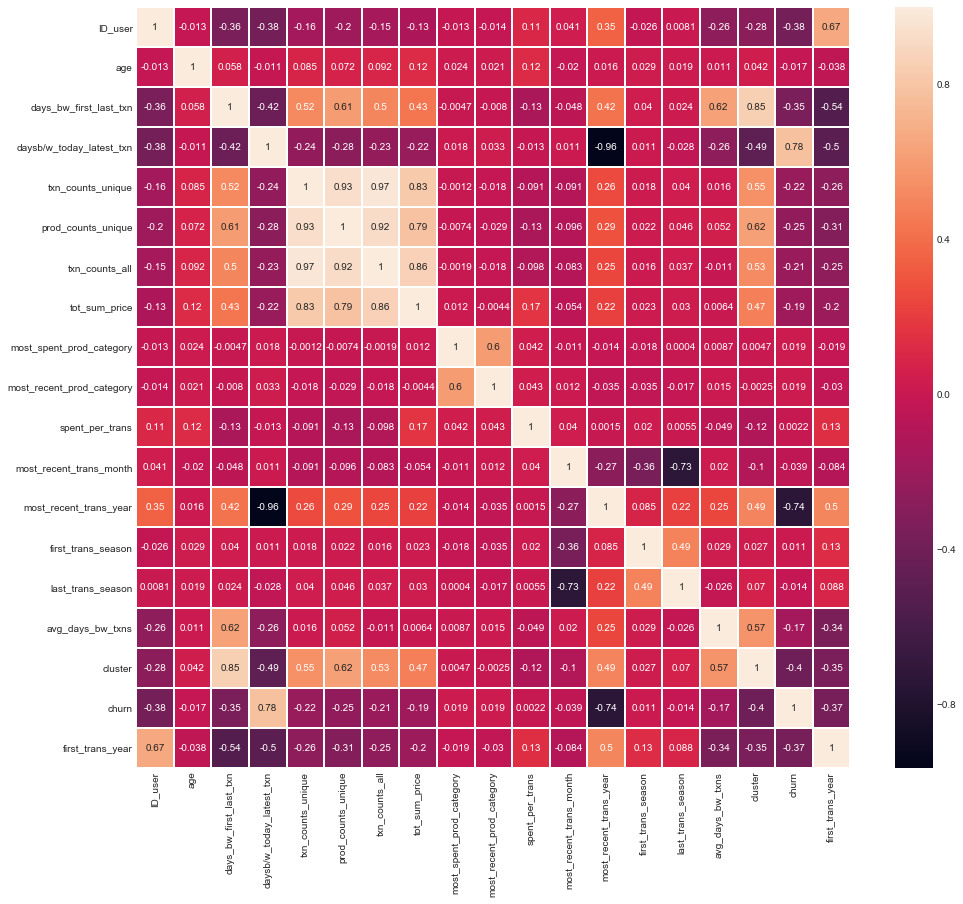

In [239]:
sns.heatmap(df.corr(), annot=True, linewidths=1)
plt.rcParams["figure.figsize"] = [16,14]
plt.savefig('corr_plot.jpg')

#### Remove unnecessary columns and label encode or one hot encode variables

Remove unwanted columns

In [189]:
new_df = df.drop(['daysb/w_today_latest_txn', 'most_recent_trans_year', 'txn_time', 
                  'first_trans_date', 'last_trans_date', 'first_trans_year'], axis=1)

In [190]:
new_df.shape[1]

17

One hot encode

In [191]:
new_df = do_one_hot_encoding(new_df, 'gender', '_gender')

In [192]:
new_df = do_one_hot_encoding(new_df, 'cluster', '_cluster')

In [193]:
new_df.shape[1]

20

#### Separate dataset into X and Y

In [194]:
X = new_df[new_df.columns.difference(['ID_user', 'churn'])]

In [195]:
Y = new_df['churn']

#### Feature Scaling

In [196]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Train Test Split

In [197]:
train_x, test_x, train_y, test_y = cross_validation.train_test_split(X_scaled, Y, train_size=0.75, random_state=333,
                                                                    stratify=Y)

#### Models

In [253]:
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from lifelines import CoxPHFitter

#### create dict for class weights
This is for dealing with imbalanced classes

In [199]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced', np.unique(train_y), train_y)
class_weight_dict = {0:class_weight[0], 1:class_weight[1]}
class_weight_dict

{0: 1.0649266609145815, 1: 0.9425353188239786}

#### feature importance study using random forests

In [201]:
rf_feature_imp = RandomForestClassifier(max_depth=15, n_estimators=500)
rf_feature_imp = rf_feature_imp.fit(train_x, train_y)

features = pd.DataFrame()
features['feature'] = X.columns.values
features['importance'] = rf_feature_imp.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)


features.plot(kind='barh', figsize=(20, 20))
plt.show()

#### Random Forest

In [202]:
#Random Forest Classifier
params = {'bootstrap':[True], 'max_depth':[5, 10, 13, 15], 'min_samples_leaf':np.logspace(0.1,3,3, dtype=int)}

rf = GridSearchCV(RandomForestClassifier(class_weight=class_weight_dict, n_estimators=1000), params, n_jobs=-1, cv=3, 
                   scoring='roc_auc', verbose=1)
rf = rf.fit(train_x, train_y)

print(rf.best_params_, rf.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   44.3s finished


{'bootstrap': True, 'max_depth': 13, 'min_samples_leaf': 1} 0.7953346102392517


In [228]:
#make predictions 
rf_preds_proba = rf.predict_proba(test_x)
rf_preds = rf.predict(test_x)
rf_preds_train = rf.predict_proba(train_x)

#confusion matrix for random forest on test data
plt.rcParams["figure.figsize"] = [7,5]
rf_conf_matx = draw_confusion_matrix(test_y, rf_preds)
give_auc_draw_roc(test_y, rf_preds)

#### Logistic Regression

In [204]:
#logistic regression classifier
params = {'penalty':['l2'], 'C':np.logspace(0.01, 2, 10), 'solver':['lbfgs', 'newton-cg']}

lr = GridSearchCV(LogisticRegression(class_weight=class_weight_dict), params, n_jobs=-1, cv=5, scoring='roc_auc', verbose=1)
lr = lr.fit(train_x, train_y)

print(lr.best_params_, lr.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.4s finished


{'C': 1.023292992280754, 'penalty': 'l2', 'solver': 'lbfgs'} 0.7386602836329472


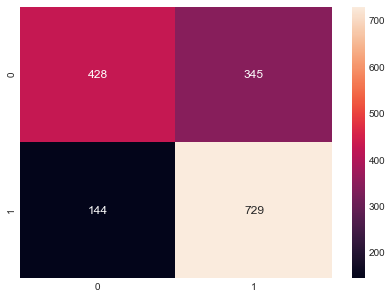

In [227]:
lr_preds = lr.predict(test_x)
lr_preds_proba = lr.predict_proba(test_x)
lr_preds_train = lr.predict_proba(train_x)

draw_confusion_matrix(test_y, lr_preds)
give_auc_draw_roc(test_y, lr_preds)

#### Bagging Classifier

In [222]:
#Bagging Classifier
params = {'bootstrap':[True]}

bc = GridSearchCV(BaggingClassifier(n_estimators=700), params, n_jobs=-1, cv=3, scoring='roc_auc', verbose=1)
bc = bc.fit(train_x, train_y)

print(bc.best_params_, bc.best_score_) 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.1s finished


{'bootstrap': True} 0.7926596959166227


In [226]:
bc_preds = bc.predict(test_x)
bc_preds_train = bc.predict_proba(train_x)
bc_preds_proba = bc.predict_proba(test_x)

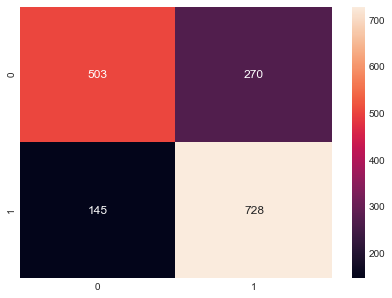

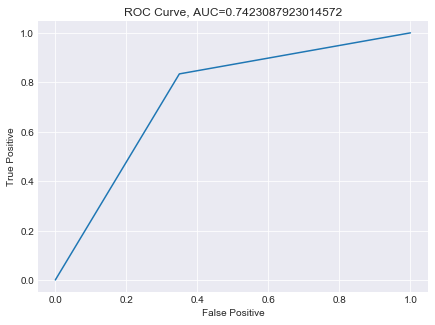

In [224]:
draw_confusion_matrix(test_y, bc_preds)
give_auc_draw_roc(test_y, bc_preds)

#### support vector

In [237]:
# svm
params = {'C': np.linspace(1000, 2000, 5) ,'gamma': np.linspace(0.001, 5, 5), 'kernel': ['rbf'], 'probability':[True]}

svc = GridSearchCV(SVC(class_weight=class_weight_dict), params, n_jobs = -1, cv=3, scoring = 'roc_auc', 
                   verbose=1)
svc = svc.fit(train_x, train_y)
svc_preds_proba = svc.predict(test_x)


print("Best C & associated score", svc.best_params_, svc.best_score_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.1min finished


Best C & associated score {'C': 1750.0, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True} 0.7434652977489332


In [235]:
svc_preds_train = svc.predict(train_x)

#### XGBoost

In [215]:
#Xgboost
params =  { 'learning_rate':[0.1], 'n_estimators':[700], 'scale_pos_weight':[1.9, 0.5, 1], 
           'max_depth':[10, 5, 15], 'colsample_bytree':[0.7]
          }

xgb = GridSearchCV(XGBClassifier(), params, n_jobs=-1, cv=3, scoring='roc_auc', verbose=1)
xgb = xgb.fit(train_x, train_y)


print("Best C & associated score", xgb.best_params_, xgb.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   49.9s finished


Best C & associated score {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 700, 'scale_pos_weight': 0.5} 0.7921106909752745


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


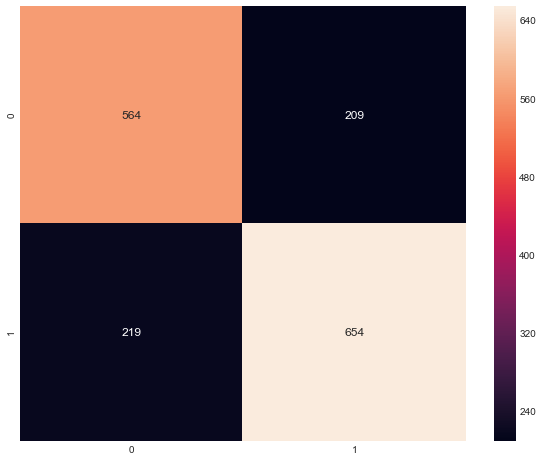

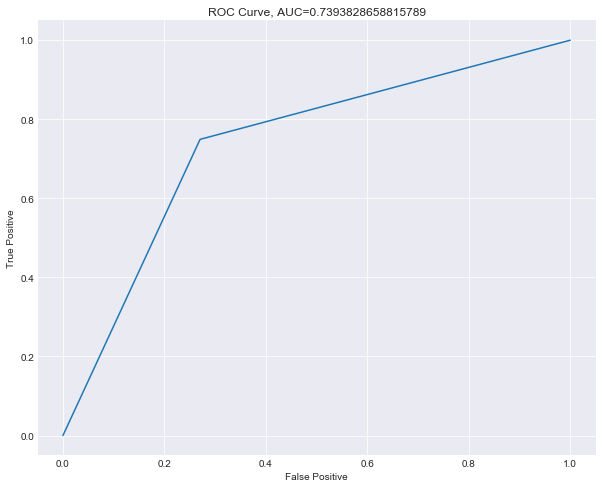

In [251]:
xgb_preds_proba = xgb.predict_proba(test_x)
xgb_preds_train = xgb.predict_proba(train_x)
xgb_preds = xgb.predict(test_x)

draw_confusion_matrix(test_y, xgb_preds)
give_auc_draw_roc(test_y, xgb_preds)
plt.rcParams["figure.figsize"] = [10,8]

#### Adaboost

In [217]:
#ada boost classifier
params = {'learning_rate': [0.1]}
abc = GridSearchCV(AdaBoostClassifier(n_estimators = 700), params, n_jobs = -1, cv=3, scoring = 'roc_auc', verbose=1)
abc.fit(train_x, train_y)

print("Best params & associated score", abc.best_params_, abc.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.2s finished


Best params & associated score {'learning_rate': 0.1} 0.7781032723505534


In [246]:
abc_preds = abc.predict(test_x)
abc_preds_proba = abc.predict_proba(test_x)
abc_preds_train = abc.predict_proba(train_x)

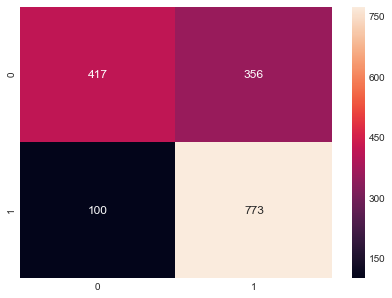

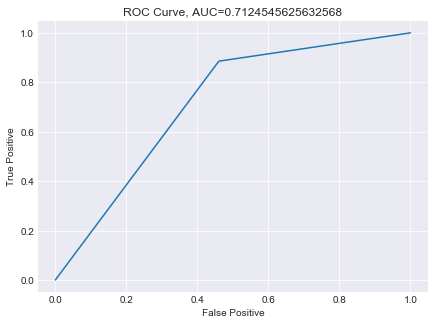

In [219]:
draw_confusion_matrix(test_y, abc_preds)
give_auc_draw_roc(test_y, abc_preds)

## Stacking

In [252]:
'''
new_X_train = pd.DataFrame({
    'rf': rf_preds_train[:,0],
    'lr': lr_preds_train[:,0],
    'xgb': xgb_preds_train[:,0],
    'abc': abc_preds_train[:,0],
    'bc': bc_preds_train[:,0]
})
'''

new_X_test = pd.DataFrame({
    'rf': rf_preds_proba[:,0],
    'lr': lr_preds_proba[:,0],
    'xgb': xgb_preds_proba[:,0],
    'abc': abc_preds_proba[:,0],
    'bc': bc_preds_proba[:,0]
})

In [310]:
train_x_2, test_x_2, train_y_2, test_y_2 = cross_validation.train_test_split(new_X_test, test_y, train_size=0.8, 
                                                                             stratify=test_y) 

Logistic Regression Model for Ensemble

In [333]:
#params = {'penalty':['l2'], 'C':[3], 'solver':['lbfgs', 'newton-cg']}

#ensembled_model_logit = GridSearchCV(LogisticRegression(), params, n_jobs=-1, cv=3, verbose=1, scoring='roc_auc')
ensembled_model_logit = LogisticRegression()
ensembled_model_logit.fit(train_x_2, train_y_2)

#print("Best params & associated score", ensembled_model_logit.best_params_, ensembled_model_logit.best_score_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [375]:
ensemble_preds = ensembled_model_logit.predict(test_x_2)
ensemble_preds_proba = ensembled_model_logit.predict_proba(test_x_2)

ensemble_preds_train = ensembled_model_logit.predict(train_x_2)

Cross Validated Scores

In [378]:
scores = cross_validation.cross_val_score(ensembled_model_logit, test_x_2, test_y_2, cv=5, scoring='precision')
scores2 = cross_validation.cross_val_score(ensembled_model_logit, test_x_2, test_y_2, cv=5, scoring='recall')
scores3 = cross_validation.cross_val_score(ensembled_model_logit, test_x_2, test_y_2, cv=5, scoring='roc_auc')

print("\033[1mCROSS VALIDATED SCORES ON TEST SET \033[0m", end="\n\n")
print("ROC AUC SCORE: ", round(np.mean(scores3), 4), end="\n\n")
print("PRECISION SCORE: ", round(np.mean(scores), 4), end="\n\n")
print("RECALL SCORE: ", round(np.mean(scores2), 4))

CROSS VALIDATED SCORES ON TEST SET 

ROC AUC SCORE:  0.838

PRECISION SCORE:  0.7366

RECALL SCORE:  0.8286


Confusion Matrix Plot

In [380]:
import itertools
from pylab import savefig
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.BuPu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    np.set_printoptions(precision=2)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt

In [367]:
conf_matrix = metrics.confusion_matrix(ensemble_preds, test_y_2)
plot_confusion_matrix(conf_matrix, ['Not Churn', 'Churn'])
plt.show()
conf_matx_fig = plt.gcf()
conf_matx_fig.savefig('conf_matx.jpg', dpi=100)

Normalized confusion matrix
[[0.75 0.25]
 [0.25 0.75]]


<Figure size 720x576 with 0 Axes>

Plot Precision Recall Curve

[ 1.99 -0.02  0.47 -1.76 -2.33 -0.36 -2.15  0.28  1.03 -1.14  1.09  0.41
 -1.74  1.04  0.7  -2.15 -1.41 -2.31  1.33  0.46  1.55 -0.95  0.63  1.51
 -1.02 -1.91  0.76 -0.82 -0.84  2.06 -1.7   0.13 -2.13 -1.19 -1.72 -0.13
 -1.6   0.31  1.32 -1.12  1.49  1.02  1.87  1.04 -1.66 -2.08  1.49  1.01
  0.58 -2.04  1.65 -1.81  0.75  2.04  1.53  1.06 -0.83  1.15  1.12 -2.01
  0.03  1.61  0.73  1.14  0.23  1.25  0.67 -0.33  0.67  1.83  0.35  0.67
 -0.45  1.57 -0.56  0.24 -1.86 -1.95  2.03 -2.15  1.54  1.68 -0.34  0.26
 -2.18  0.05 -2.25  1.39 -2.18  1.64  0.52 -1.76  0.49 -2.3  -0.31 -0.82
 -0.04 -0.74 -2.   -2.09 -0.79 -0.16  1.    2.17  0.98  0.38  2.08 -0.42
  1.65 -1.12  0.79  1.72  1.89  2.05  1.55  0.62  0.51  0.83 -1.46 -1.74
 -0.37  1.23 -1.29 -1.84  1.43 -1.89  0.38  1.91  1.57 -0.24 -1.37  1.99
  0.81  1.93  2.2  -0.75 -0.05  1.54  1.51 -1.74 -0.15  0.31  1.51 -1.31
 -0.64 -1.51  1.38 -2.22 -0.34  0.65  0.27  1.58  1.35  1.46  0.72 -2.3
 -1.98 -1.81  1.02 -1.47 -0.06 -1.66  0.8   0.1   0.

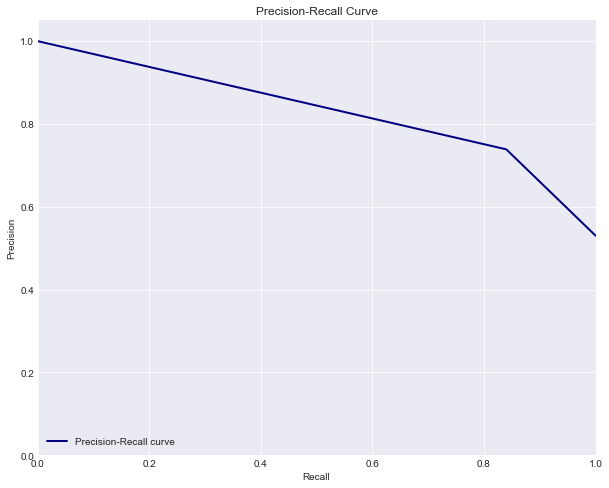

In [382]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from itertools import cycle

y_score = ensembled_model_logit.fit(test_x_2, test_y_2).decision_function(test_x_2)

print(y_score)
colors = cycle(['darkorange', 'cornflowerblue', 'teal'])
precision = dict()
recall = dict()
average_precision = dict()
for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(test_y_2,
                                                        ensemble_preds)
    average_precision[i] = average_precision_score(ensemble_preds, test_y_2)
 

    average_precision["micro"] = average_precision_score(test_y_2, y_score,
                                                     average="micro")


lw = 2
plt.clf()
plt.plot(recall[0], precision[0], lw=lw, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.savefig('PR-Curve.jpg')

# Survival analysis

In [608]:
from lifelines import CoxPHFitter
from sklearn import preprocessing
from datetime import datetime

In [622]:
new_df_survival = df.drop(['most_recent_trans_year', 'txn_time', 
                  'last_trans_date', 'first_trans_year', 'daysb/w_today_latest_txn'], axis=1)

In [623]:
new_df_survival.head()

ID_user  gender        age  days_bw_first_last_txn     first_trans_date  \
0    8985038  female  46.213898                    1495  2010-11-08 10:01:00   
1  174867143  female  59.000000                    1281  2011-10-04 10:05:00   
2    9115418    male  38.000000                    1380  2010-11-08 12:59:00   
3   53946950  female  43.000000                    1522  2011-01-26 13:24:00   
4  184235069  female  34.092336                    1274  2011-10-30 19:54:00   

   txn_counts_unique  prod_counts_unique  txn_counts_all  tot_sum_price  \
0                 72                  26             196      2496286.0   
1                163                  78             317      2154321.0   
2                258                  75             344      2070991.0   
3                126                  41             212      1510886.0   
4                128                  52             168      1265108.0   

   most_spent_prod_category  most_recent_prod_category  spent_per_trans  \
0                     262.0                      490.0     12736.153061   
1                     262.0                      200.0      6795.965300   
2                     104.0                      154.0      6020.322674   
3                     104.0                      200.0      7126.820755   
4                     490.0                      200.0      7530.404762   

   most_recent_trans_month  first_trans_season  last_trans_season  \
0                       12                   0                  0   
1                        4                   0                  1   
2                        8                   0                  2   
3                        3                   3                  1   
4                        4                   0                  1   

   avg_days_bw_txns  cluster  churn  
0              7.63        2      0  
1              4.04        2      0  
2              4.01        2      1  
3              7.18        2      0  
4              7.58        2      0

In [624]:
new_df_survival.shape

(6583, 18)

In [625]:
new_df_survival['gender'] = label_encoding_func(new_df_survival, 'gender')

In [626]:
def convert_to_datetime_return_days(txn_time):
    today = datetime.strptime("2015-05-04 07:33:00", '%Y-%m-%d %H:%M:%S')
    datetime_object = datetime.strptime(txn_time, '%Y-%m-%d %H:%M:%S')
    return (today - datetime_object).days

new_df_survival['days_of_service'] = new_df_survival['first_trans_date'].apply(convert_to_datetime_return_days)

In [627]:
new_df_survival = new_df_survival.drop('first_trans_date', axis=1)

Cox PH

In [632]:
cph3 = CoxPHFitter()
cph3.fit(new_df_survival, duration_col='days_of_service', event_col='churn', show_progress=True, step_size=0.1)

Iteration 1: norm_delta = 0.65983, step_size = 0.10000, ll = -26447.34955, seconds_since_start = 0.4
Iteration 2: norm_delta = 0.30402, step_size = 0.10000, ll = -25803.65571, seconds_since_start = 0.7
Iteration 3: norm_delta = 0.21559, step_size = 0.10000, ll = -25463.36478, seconds_since_start = 1.1
Iteration 4: norm_delta = 0.20462, step_size = 0.12000, ll = -25215.30500, seconds_since_start = 1.5
Iteration 5: norm_delta = 0.19774, step_size = 0.14400, ll = -24985.08392, seconds_since_start = 1.8
Iteration 6: norm_delta = 0.19315, step_size = 0.17280, ll = -24774.43198, seconds_since_start = 2.2
Iteration 7: norm_delta = 0.18968, step_size = 0.20736, ll = -24586.65457, seconds_since_start = 2.5
Iteration 8: norm_delta = 0.18638, step_size = 0.24883, ll = -24425.52757, seconds_since_start = 2.9
Iteration 9: norm_delta = 0.18197, step_size = 0.29860, ll = -24294.27590, seconds_since_start = 3.3
Iteration 10: norm_delta = 0.17409, step_size = 0.35832, ll = -24194.63894, seconds_since_s

<lifelines.CoxPHFitter: fitted with 6583 observations, 3091 censored>

In [633]:
cph3.print_summary()

n=6583, number of events=3492

                             coef  exp(coef)  se(coef)        z      p  lower 0.95  upper 0.95     
ID_user                    0.0000     1.0000    0.0000  52.6948 0.0000      0.0000      0.0000  ***
gender                    -0.0232     0.9771    0.0352  -0.6589 0.5100     -0.0922      0.0458     
age                       -0.0086     0.9914    0.0022  -3.8360 0.0001     -0.0130     -0.0042  ***
days_bw_first_last_txn    -0.0025     0.9975    0.0001 -18.9213 0.0000     -0.0027     -0.0022  ***
txn_counts_unique          0.0045     1.0045    0.0133   0.3356 0.7372     -0.0216      0.0305     
prod_counts_unique        -0.0316     0.9689    0.0192  -1.6451 0.0999     -0.0693      0.0061    .
txn_counts_all             0.0015     1.0015    0.0088   0.1677 0.8668     -0.0158      0.0187     
tot_sum_price              0.0000     1.0000    0.0000   0.8245 0.4096     -0.0000      0.0000     
most_spent_prod_category   0.0006     1.0006    0.0001   4.2350 0.000

In [634]:
X = new_df_survival.drop(["days_of_service", "churn"], axis=1)

In [635]:
X_cluster1 = X[X['cluster']==0]
X_cluster2 = X[X['cluster']==1]
X_cluster3 = X[X['cluster']==2]

In [644]:
cluster3_survivals = cph3.predict_survival_function(X_cluster3)

In [645]:
cluster2_survivals = cph3.predict_survival_function(X_cluster2)

In [646]:
cluster1_survivals = cph3.predict_survival_function(X_cluster1)

Survival Function for some random users from each cluster

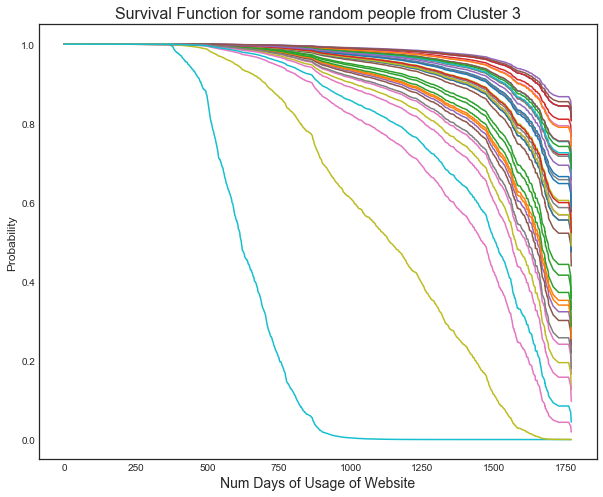

In [688]:
cluster3_survivals.iloc[:,20:60].plot(legend=None)
plt.title('Survival Function for some random people from Cluster 3', fontsize=16)
plt.xlabel('Num Days of Usage of Website', fontsize=14)
plt.ylabel('Probability', fontsize=12)
sns.set_style('white')
plt.savefig('survival1.jpg')

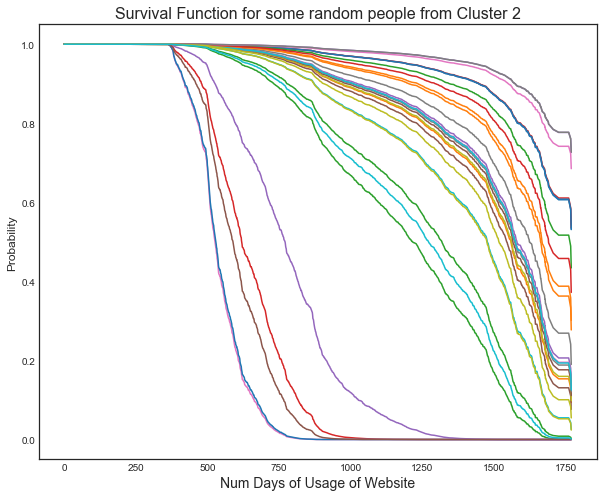

In [689]:
cluster2_survivals.iloc[:, 1020:1050].plot(legend=None)
plt.title('Survival Function for some random people from Cluster 2', fontsize=16)
plt.xlabel('Num Days of Usage of Website', fontsize=14)
plt.ylabel('Probability', fontsize=12)
sns.set_style('white')
plt.savefig('survival2.jpg')

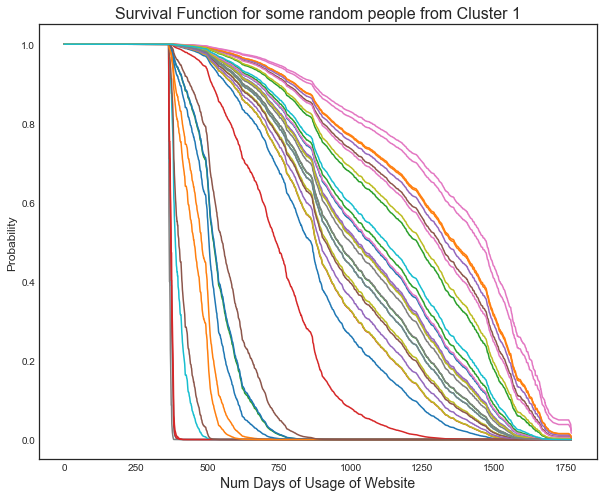

In [692]:
cluster1_survivals.iloc[:, 0:40].plot(legend=None)
plt.title('Survival Function for some random people from Cluster 1', fontsize=16)
plt.xlabel('Num Days of Usage of Website', fontsize=14)
plt.ylabel('Probability', fontsize=12)
sns.set_style('white')
plt.savefig('survival3.jpg')